In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [4]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [5]:
jasper.streams()

[http://jasper:8181/jasper/streams/bluecount,
 http://streamhub:9292/streamhub/streams/colorstream,
 http://redstream:1255/red,
 http://jasper:8181/jasper/streams/reasoning]

# If you did not create the yellow color stream before go back to Ex4

In [6]:
qid  = 'reasoning2'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
frmt = 'JSON'
body = '''
    PREFIX colors: <http://www.streamreasoning.org/ontologies/2018/9/colors#>
    SELECT (COUNT(?p) AS ?cntPrimary) (COUNT(?d) AS ?cntDerived) ((?cntPrimary>?cntDerived) as ?morePrimaryThanDerived)  
    FROM NAMED WINDOW <cw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT15S STEP PT5S]
    FROM NAMED WINDOW <yw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT15S STEP PT5S]
    WHERE {
        { WINDOW ?pw { ?p a colors:Primary . }}
        UNION
        { WINDOW ?dw { ?d a colors:Derived . }}
    }

    '''

In [7]:
reasoning2q = jasper.create(qid, body, tbox, frmt)

In [8]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [9]:
endpoint = reasoning2q.stream().endpoints()[0]

In [14]:
resp = endpoint.call()

In [15]:
resp

[
    {
        "morePrimaryThanDerived": true,
        "cntPrimary": 1,
        "eventTime": 1589229326580,
        "cntDerived": 0,
        "processingTime": 1589229326598
    },
    {
        "morePrimaryThanDerived": true,
        "cntPrimary": 1,
        "eventTime": 1589229326580,
        "cntDerived": 0,
        "processingTime": 1589229326602
    },
    {
        "morePrimaryThanDerived": true,
        "cntPrimary": 1,
        "eventTime": 1589229326580,
        "cntDerived": 0,
        "processingTime": 1589229326603
    },
    {
        "morePrimaryThanDerived": true,
        "cntPrimary": 1,
        "eventTime": 1589229326580,
        "cntDerived": 0,
        "processingTime": 1589229326610
    },
    {
        "morePrimaryThanDerived": true,
        "cntPrimary": 1,
        "eventTime": 1589229326580,
        "cntDerived": 0,
        "processingTime": 1589229326611
    }
]

In [16]:
df = resp.dataframe(['cntPrimary', 'cntDerived'])
df

,cntDerived,cntPrimary,eventTime,morePrimaryThanDerived,processingTime
0,0,1,1589229326580,True,1589229326598
1,0,1,1589229326580,True,1589229326602
2,0,1,1589229326580,True,1589229326603
3,0,1,1589229326580,True,1589229326610
4,0,1,1589229326580,True,1589229326611


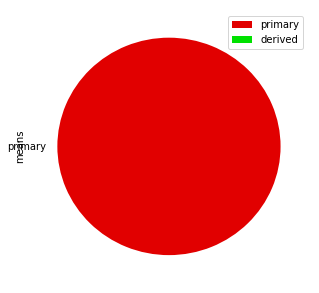

In [17]:
%matplotlib inline
import pandas as pd

df1 = df[['cntPrimary', 'cntDerived']]
cntg_mean = df1['cntPrimary'].mean()
cntr_mean = df1['cntDerived'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['primary', 'derived'])
plot = df.plot.pie(y='means', colors=["#e10000", "#00e100"], figsize=(5, 5))

In [19]:
jasper.delete(qid)

'Not Found Resource with id [reasoning2]'